출처 : https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html

# validation_curve()

단일 하이퍼 파라미터 최적화, 파라미터를 입력 받아 파라미터 범위의 모든 경우에 대해 성능 기준을 계산

# 파라미터

estimator : 학습, 예측 방법 객체 입력

X : 학습에 사용될 데이터

y : 목표 데이터

param_name : 최적화할 파라미터 이름

param_range : 파라미터 범위

groups : train / test 데이터 분할 방법

cv : 교차 검증 분할 수 결정

scoring : 예측 성능 평가 방법, 보통 accuracy 로 지정하여서 정확도로 성능 평가
 
n_jobs : 병렬로 실행할 작업 수

pre_dispatch : 병렬 실행을 위해 사전 디스패치된 작업 수

verbose : 자세한 정도를 조정(기본값 : 0)

fit_params : 예측 모델 학습 방법

error_score : 오차 점수

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits() # 데이터 호출
X, y = digits.data, digits.target # 데이터 할당

param_range = np.logspace(-6, -1, 10) # 하한 -6, 상한 -1의 범위의 로그 수 10개를 할당

In [8]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y,
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

CPU times: user 52.7 s, sys: 54.1 ms, total: 52.7 s
Wall time: 54.3 s


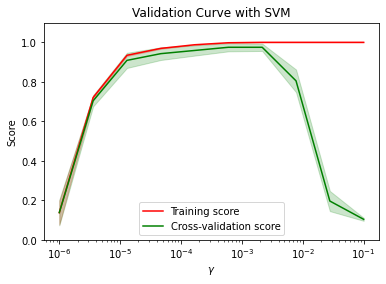

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.semilogx(param_range, train_scores_mean, label="Training score", color="r") # train 데이터 평가 점수 평균 그래프
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r") # train 데이터 평가 점수의 표준편차 범위 그래프
plt.semilogx(param_range, test_scores_mean,
             label="Cross-validation score", color="g") # test 데이터 평가 점수 평균 그래프
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g") # test 데이터 평가 점수의 표준편차 범위 그래프
plt.legend(loc="best") # 범례 표시
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

# GridSearchCV
분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정 값들을 비교하여 가장 적절한 파라미터를 찾음

estimator : classifier, regressor, pipeline 등 가능

param_grid : 튜닝에 사용될 파라미터를 dictionary 형태로 입력

scoring : 예측 성능 평가 방법, 보통 accuracy 로 지정하여서 정확도로 성능 평가

cv : 교차 검증 분할 수 결정

refit : True가 디폴트로 True 입력 시 최적의 하이퍼 파라미터를 찾아서 재학습

### 결과
grid_scores_ : param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.

parameters : 사용된 파라미터

mean_validation_score : 교차 검증(cross-validation) 결과의 평균값

cv_validation_scores : 모든 교차 검증(cross-validation) 결과

best_score_ : 최고 점수 

best_params_ : 최고 점수를 낸 파라미터

best_estimator_ : 최고 점수를 낸 파라미터를 가진 모형

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

CPU times: user 3min 27s, sys: 287 ms, total: 3min 28s
Wall time: 3min 27s


In [13]:
gs.cv_results_["params"]

[{'clf__C': 0.0001, 'clf__kernel': 'linear'},
 {'clf__C': 0.001, 'clf__kernel': 'linear'},
 {'clf__C': 0.01, 'clf__kernel': 'linear'},
 {'clf__C': 0.1, 'clf__kernel': 'linear'},
 {'clf__C': 1.0, 'clf__kernel': 'linear'},
 {'clf__C': 10.0, 'clf__kernel': 'linear'},
 {'clf__C': 100.0, 'clf__kernel': 'linear'},
 {'clf__C': 1000.0, 'clf__kernel': 'linear'},
 {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C

In [14]:
gs.cv_results_["mean_test_score"]

array([0.23120112, 0.91485413, 0.95046245, 0.95547176, 0.95658908,
       0.95658908, 0.95658908, 0.95658908, 0.13089385, 0.13536313,
       0.13927374, 0.12418994, 0.1001676 , 0.13089385, 0.10687151,
       0.1001676 , 0.13089385, 0.13536313, 0.13927374, 0.12418994,
       0.1001676 , 0.13089385, 0.10687151, 0.1001676 , 0.13089385,
       0.13536313, 0.14429857, 0.12418994, 0.1001676 , 0.13089385,
       0.10687151, 0.1001676 , 0.13089385, 0.68335816, 0.90761639,
       0.40958101, 0.1001676 , 0.13089385, 0.10687151, 0.1001676 ,
       0.70449721, 0.93153011, 0.96047796, 0.90317505, 0.12469894,
       0.1001676 , 0.10128492, 0.1001676 , 0.93264742, 0.95547176,
       0.96937927, 0.90540348, 0.13416511, 0.1001676 , 0.10128492,
       0.1001676 , 0.95547796, 0.96047796, 0.96937927, 0.90540348,
       0.13416511, 0.1001676 , 0.10128492, 0.1001676 , 0.95825885,
       0.95935754, 0.96937927, 0.90540348, 0.13416511, 0.1001676 ,
       0.10128492, 0.1001676 ])

In [15]:
print(gs.best_score_)
print(gs.best_params_)

0.969379267535692
{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
